In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping
import cv2

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
# Set the path to the directory containing images of the specific class
class_directory = r'data\val\1'

# Set the path to the directory where augmented images will be saved
augmented_directory = r'data\val\1'

# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    shear_range=0.2,
    horizontal_flip=True,
    
    
)

# List all image files in the class directory
image_files = [f for f in os.listdir(class_directory) if os.path.isfile(os.path.join(class_directory, f))]

# Perform data augmentation and save augmented images
for image_file in image_files:
    # Load the image
    img_path = os.path.join(class_directory, image_file)
    img = tf.keras.utils.load_img(img_path)
    img_array =tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Generate augmented images
    augmentations = datagen.flow(img_array, batch_size=1, save_to_dir=augmented_directory, save_prefix='aug', save_format='png')

    # Perform data augmentation and save the images
    for i in range(2):  # Save 5 augmented images for each original image
        augmented_image = augmentations.next()
        augmented_image = tf.keras.utils.array_to_img(augmented_image[0])
        augmented_image.save(os.path.join(augmented_directory, f'augmented_{i}_{image_file}'))


Total number of images in emotion 0: 3995
Total number of images in emotion 1: 2529
Total number of images in emotion 2: 4097
Total number of images in emotion 3: 7215
Total number of images in emotion 4: 4830
Total number of images in emotion 5: 3171
Total number of images in emotion 6: 4965


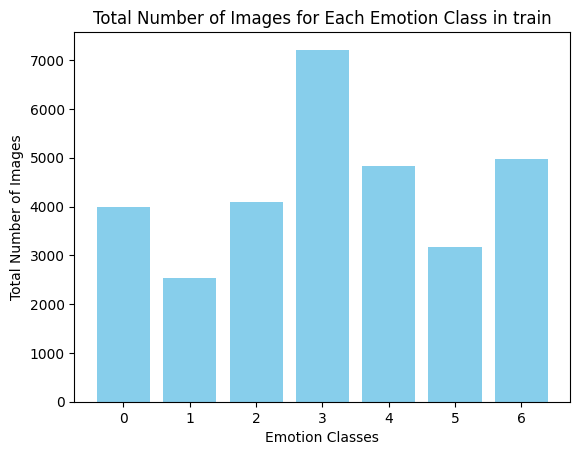

In [3]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return 0

    # Count the number of files with common image extensions
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.tif']
    image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(tuple(image_extensions)))

    return image_count

# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/train/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in train')
plt.show()


Total number of images in emotion 0: 467
Total number of images in emotion 1: 762
Total number of images in emotion 2: 496
Total number of images in emotion 3: 895
Total number of images in emotion 4: 653
Total number of images in emotion 5: 415
Total number of images in emotion 6: 607


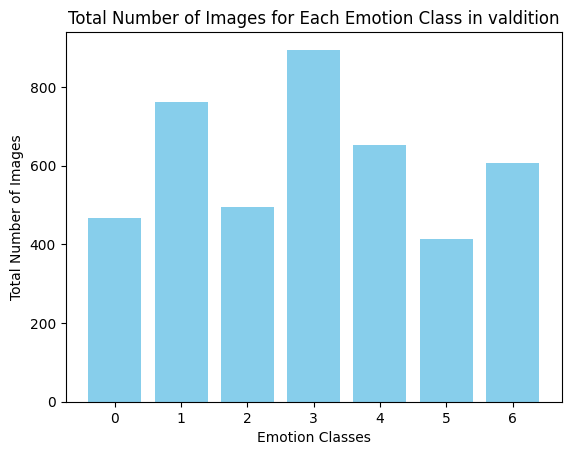

In [5]:
# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/val/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in valdition')
plt.show()



Total number of images in emotion 0: 491
Total number of images in emotion 1: 275
Total number of images in emotion 2: 528
Total number of images in emotion 3: 879
Total number of images in emotion 4: 594
Total number of images in emotion 5: 416
Total number of images in emotion 6: 626


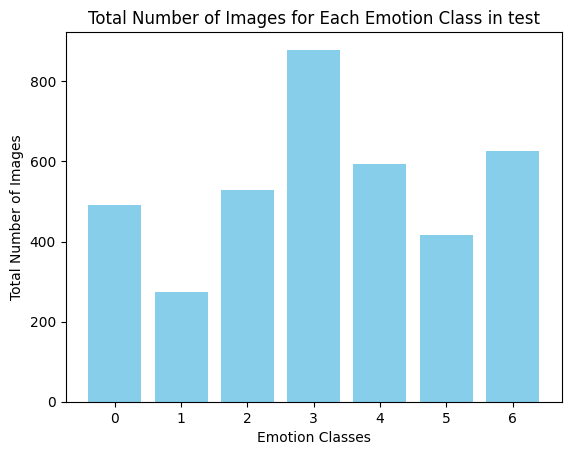

In [8]:
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']
total_images_per_emotion = []

# Iterate through each emotion folder
for emotion_folder in emotion_folders:
    folder_path = f'data/test/{emotion_folder}'  # Adjust the path based on your directory structure
    total_images = count_images_in_folder(folder_path)
    total_images_per_emotion.append(total_images)
    print(f'Total number of images in emotion {emotion_folder}: {total_images}')

# Plotting the bar graph
plt.bar(emotion_folders, total_images_per_emotion, color='skyblue')
plt.xlabel('Emotion Classes')
plt.ylabel('Total Number of Images')
plt.title('Total Number of Images for Each Emotion Class in test')
plt.show()
